In [1]:
# this is the unsupervisor project using the kmeans algorithman 
# hire i will store my result in the drive because i have problem with memore 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [60]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Unsupervisor_learning\\Clustering\\employee-compensation.csv")

In [61]:
data

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.00,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [64]:
data.shape

(683277, 22)

# Do you need to reduce the number of columns?

In [63]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [6]:
# We need to reduce the number of columns because some columns does not have impact in our analyses like
# Organization Group Code  and others basically is a "duplicate of columns" like for example the total salary is a sum
# of all salaries paid to City employees.So we can use the parcials salaries in our analyses 
# variable like Union, Employee Identifier... is just for get idea about our data and these will not have a big
# impact in our analyses

# Is your data clean?

In [65]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
# as we can see Our data is not cleaning , we have null value in Department Code ,Department,Union Code,Union  and job
# visualize the null column.

In [8]:
data[data['Department Code'].isnull()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
553552,7,8300,8300,Fiscal,2017,General City Responsibilities,NaN,NaN,790.0,"SEIU, Local 1021, Misc",...,37042591,49630.50,15016.51,4575.73,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24
553553,7,Q000,Q003,Fiscal,2017,General City Responsibilities,NaN,NaN,911.0,POA,...,37069439,116189.62,40990.09,2260.08,159439.79,20076.66,14515.01,2724.05,37315.72,196755.51


In [66]:
data1=data.dropna()

In [67]:
data1

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.00,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [68]:
print (data.shape)
print (data1.shape)

(683277, 22)
(682919, 22)


In [44]:
# see the info about my new data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 1 to 6
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Family Code      682919 non-null  object 
 1   Job Code             682919 non-null  object 
 2   Year Type            682919 non-null  object 
 3   Year                 682919 non-null  int64  
 4   Organization Group   682919 non-null  object 
 5   Department Code      682919 non-null  object 
 6   Department           682919 non-null  object 
 7   Union Code           682919 non-null  float64
 8   Union                682919 non-null  object 
 9   Job Family           682919 non-null  object 
 10  Job                  682919 non-null  object 
 11  Employee Identifier  682919 non-null  int64  
 12  Salaries             682919 non-null  float64
 13  Overtime             682919 non-null  float64
 14  Other Salaries       682919 non-null  float64
 15  Total Salary         6

In [45]:
data1.isnull().sum()

Job Family Code        0
Job Code               0
Year Type              0
Year                   0
Organization Group     0
Department Code        0
Department             0
Union Code             0
Union                  0
Job Family             0
Job                    0
Employee Identifier    0
Salaries               0
Overtime               0
Other Salaries         0
Total Salary           0
Retirement             0
Health and Dental      0
Other Benefits         0
Total Benefits         0
Total Compensation     0
dtype: int64

In [15]:
# see the unique value for each column 
col_name=data1.columns
for i in col_name:
    print('column',i,' has :',data1[i].nunique(),"Unique values")

column Organization Group Code  has : 7 Unique values
column Job Family Code  has : 59 Unique values
column Job Code  has : 1210 Unique values
column Year Type  has : 2 Unique values
column Year  has : 8 Unique values
column Organization Group  has : 7 Unique values
column Department Code  has : 60 Unique values
column Department  has : 109 Unique values
column Union Code  has : 70 Unique values
column Union  has : 129 Unique values
column Job Family  has : 59 Unique values
column Job  has : 1348 Unique values
column Employee Identifier  has : 309658 Unique values
column Salaries  has : 498267 Unique values
column Overtime  has : 261976 Unique values
column Other Salaries  has : 307729 Unique values
column Total Salary  has : 614930 Unique values
column Retirement  has : 451568 Unique values
column Health and Dental  has : 209844 Unique values
column Other Benefits  has : 496051 Unique values
column Total Benefits  has : 616180 Unique values
column Total Compensation  has : 658354 Uniq

In [16]:
data1.Job.unique()

array(['IS Administrator 1', 'IS Administrator 3', 'IS Trainer-Assistant',
       ..., 'Customer Service Rep Trainee', 'Customer Service Rep Spv',
       'Mayoral Staff I'], dtype=object)

In [17]:
data1.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

# What all parameters do we need to give to our clustering algorithm?

We need parameters that will have an impact on our analyses so for the clustering algorithm I will choose 4 parameters that are: Salaries 'Overtime', 'Other Salaries', 'Retirement','Health and Dental', 'Other Benefits']]

As we can see in the described problem: Normal salaries paid to permanent or temporary City employee so we have to include it because is important for analyses Overtime is the fact a kind of salary, but I include it in our analyses because we have an employee who would be temporary or not work 40h. Those employees are not include in the overtime category Other Salaries like the problem described, it may include SC, irregular payments made to City employees including premium pay,

# drop all variable that we do not need


In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  682919 non-null  int64  
 1   Job Family Code          682919 non-null  object 
 2   Job Code                 682919 non-null  object 
 3   Year Type                682919 non-null  object 
 4   Year                     682919 non-null  int64  
 5   Organization Group       682919 non-null  object 
 6   Department Code          682919 non-null  object 
 7   Department               682919 non-null  object 
 8   Union Code               682919 non-null  float64
 9   Union                    682919 non-null  object 
 10  Job Family               682919 non-null  object 
 11  Job                      682919 non-null  object 
 12  Employee Identifier      682919 non-null  int64  
 13  Salaries                 682919 non-null  float64
 14  Over

In [71]:
features_to_drop=['Organization Group Code','Job Family Code','Job Code','Year Type','Organization Group','Department Code',
                  'Department','Union','Job Family','Job',
       'Year','Union Code','Employee Identifier', 'Total Salary', 'Total Benefits',
       'Total Compensation']

In [103]:
final_data=data1.drop(features_to_drop,axis=1)

In [50]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Salaries           682919 non-null  float64
 1   Overtime           682919 non-null  float64
 2   Other Salaries     682919 non-null  float64
 3   Retirement         682919 non-null  float64
 4   Health and Dental  682919 non-null  float64
 5   Other Benefits     682919 non-null  float64
dtypes: float64(6)
memory usage: 56.5 MB


C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


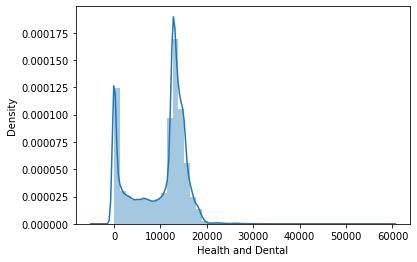

In [22]:
sns.distplot(data1['Health and Dental'])
plt.show()

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or a lack of outliers. A uniform distribution would be the extreme case.

==============================================================

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,precisely%2C%20the%20lack%20of%20symmetry.&text=Kurtosis%20is%20a%20measure%20of,have%20heavy%20tails%2C%20or%20outlier

In [23]:
print("Skewness: %f" % data1['Salaries'].skew())
print("Kurtosis: %f" % data1['Salaries'].kurt())


Skewness: 0.575171
Kurtosis: 0.711238


<AxesSubplot:ylabel='count'>

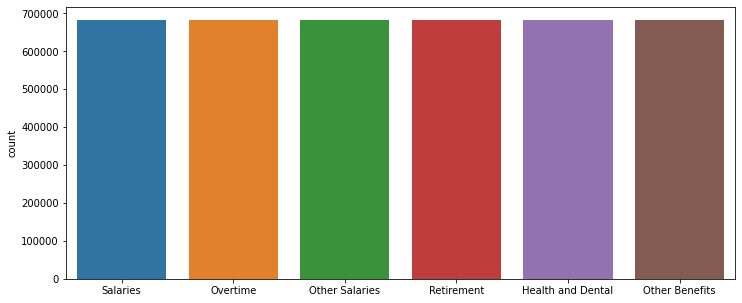

In [24]:
# let's see the range salary , overtime and all others informatiom for those variable that i considered by ploting the bar plot
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=final_data)

In [73]:
from sklearn.cluster import KMeans

In [74]:
kmeans=KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

# fit the data to a clustering model.

In [53]:
y_predict=kmeans.fit_predict(data1[[ 'Salaries', 'Overtime', 'Other Salaries', 'Retirement',
       'Health and Dental', 'Other Benefits']])

In [54]:
print(kmeans.cluster_centers_)

[[ 73354.83187703   5699.21139785   3267.55032415  14826.59485629
   12584.60460496   6056.8034754 ]
 [ 15301.38602918    567.57889815   1543.77066127   2285.7645795
    2864.03739998   1324.5149819 ]
 [134951.53064213  11659.20302448   7998.81778347  26709.87174741
   14272.62207492   8034.375513  ]]


In [55]:
y=kmeans.labels_
print(y)

[0 0 0 ... 0 2 2]


In [56]:
# appedent my y_predict in my data frame to see how it look like
final_data['cluster']=y_predict

final_data.head(20)

,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
0,57534.65,0.0,0.00,11253.16,11961.34,4532.63,0
1,57678.50,0.0,0.00,10284.88,7176.80,4755.14,0
2,63532.93,0.0,0.00,12495.83,12918.24,4702.71,0
3,101274.51,0.0,-7058.59,19644.45,12918.24,7458.76,0
4,5084.00,0.0,0.00,1083.90,956.91,387.50,1
5,34456.00,0.0,0.00,7346.00,3827.63,2579.95,1
6,139889.00,0.0,0.00,26799.23,12918.24,9791.54,2
7,46572.00,0.0,0.00,9929.16,5741.44,3822.28,0
8,84681.53,0.0,0.00,16661.84,12918.24,6838.44,0
9,10611.01,0.0,0.00,1879.20,1435.36,827.09,1


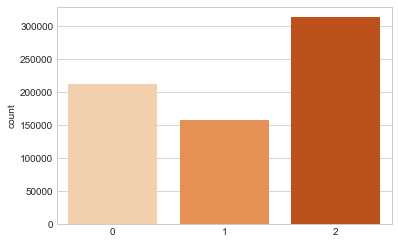

In [68]:
# see if my data is balanced or not by using the countplot 
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

In [20]:
# As we can see in the counterplot, we can say that our data are balanced because we do not have disproportionality between clustering 0,1 and 2
# even now that we have more number 2 than 0 or 1


# # Find the number of clusters for the data.

In [21]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [22]:
k_rang=range(1,10)
sse=[] # my some of squere error is an array
for k in range(1,10):
    km=KMeans(n_clusters=k) # for each iteration i create a new model which cluster =k
    km.fit(final_data[['Salaries','Overtime','Other Salaries','Retirement','Health and Dental','Other Benefits']])
    # to get the sum of square error i will call the inertia parameter
    sse.append(km.inertia_)

In [24]:
sse 

[1825681970334543.0,
 768126299929963.9,
 432490869029015.1,
 323969802683583.44,
 266733714252492.75,
 217756560298422.1,
 190906125701392.28,
 171214034600359.6,
 155988004184880.66]

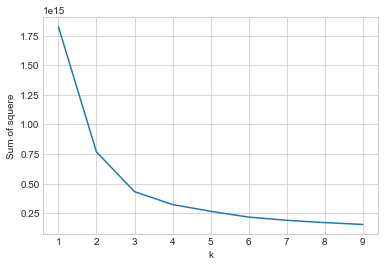

In [87]:
plt.xlabel('k')
plt.ylabel('Sum of squere')
plt.plot(k_rang,sse)

The number of clustering is 3

NameError: name 'varExplained' is not defined

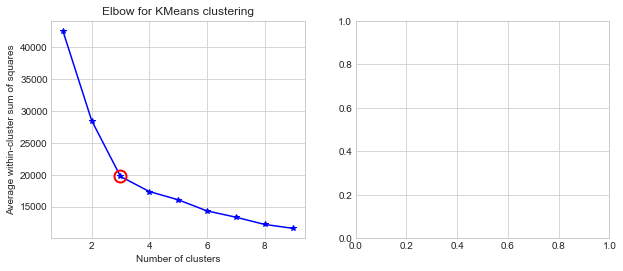

In [88]:
kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

# Try fitting the model to both the clustering algorithms you have learnt,K-Means and Hierarchical clustering.

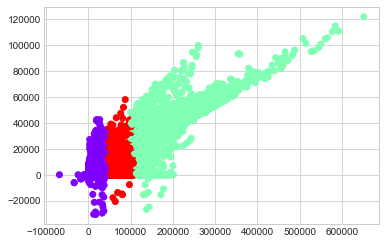

In [83]:
plt.scatter(final_data.iloc[:,0].values,final_data.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

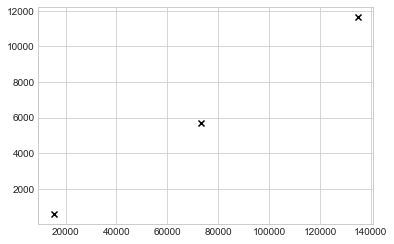

In [69]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

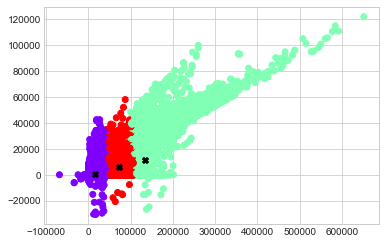

In [82]:
plt.scatter(final_data.iloc[:,0].values,final_data.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="X", color='k')
plt.show()


We can see the 3 clustering with the centroid 

# Now let's try fitting the model using the Hierarchical clustering model

In [25]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [26]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [77]:
#final_data = final_data.drop('cluster')
final_data = final_data.drop(final_data.columns[['cluster']], axis=1)

C:\Users\marce\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [78]:
final_data

,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits
0,57534.65,0.0,0.00,11253.16,11961.34,4532.63
1,57678.50,0.0,0.00,10284.88,7176.80,4755.14
2,63532.93,0.0,0.00,12495.83,12918.24,4702.71
3,101274.51,0.0,-7058.59,19644.45,12918.24,7458.76
4,5084.00,0.0,0.00,1083.90,956.91,387.50
...,...,...,...,...,...,...
683272,98444.94,0.0,0.00,20540.24,15275.18,8019.49
683273,9416.71,0.0,0.00,1904.43,1468.77,743.51
683274,96475.00,0.0,576.00,20241.56,14100.16,7897.00
683275,115943.00,0.0,0.00,24188.37,15275.18,9018.34


In [81]:
plt.figure(figsize=(15,10))
Z=linkage(final_data,method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

MemoryError: Unable to allocate 1.70 TiB for an array with shape (233188838821,) and data type float64

<Figure size 1080x720 with 0 Axes>

In [86]:
""" dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        }
"""

In [92]:
# I had problem with the memory, so i will reduce the reduce element in my data by specify number of rows to import. For exampe:   nrows=10000) will only read the first 10000 rows (including the heading)..

In [90]:
Hierarchical_data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Unsupervisor_learning\\Clustering\\employee-compensation.csv",nrows=10000)


In [91]:
Hierarchical_data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [97]:
Hierarchical_data.shape

(10000, 22)

In [102]:
Hierarchical_data.info

<bound method DataFrame.info of       Organization Group Code Job Family Code Job Code Year Type  Year  \
0                           1            1000     1021  Calendar  2013   
1                           1            1000     1023  Calendar  2013   
2                           1            1000     1031  Calendar  2013   
3                           1            1000     1054  Calendar  2013   
4                           1            1000     1062  Calendar  2013   
...                       ...             ...      ...       ...   ...   
9995                        2            7200     7252  Calendar  2013   
9996                        2            7200     7252  Calendar  2013   
9997                        2            7200     7252  Calendar  2013   
9998                        2            7200     7252  Calendar  2013   
9999                        2            7200     7252  Calendar  2013   

                           Organization Group Department Code  \
0             

In [104]:
features_to_drop=['Organization Group Code','Job Family Code','Job Code','Year Type','Organization Group','Department Code',
                  'Department','Union','Job Family','Job',
       'Year','Union Code','Employee Identifier', 'Total Salary', 'Total Benefits',
       'Total Compensation']

In [105]:
Hierarchical_final_data=Hierarchical_data.drop(features_to_drop,axis=1)

In [106]:
Hierarchical_final_data

,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits
0,57534.65,0.00,0.00,11253.16,11961.34,4532.63
1,57678.50,0.00,0.00,10284.88,7176.80,4755.14
2,63532.93,0.00,0.00,12495.83,12918.24,4702.71
3,101274.51,0.00,-7058.59,19644.45,12918.24,7458.76
4,5084.00,0.00,0.00,1083.90,956.91,387.50
...,...,...,...,...,...,...
9995,112706.52,0.00,8062.71,23153.16,12918.25,9490.50
9996,110095.97,0.00,8251.51,22678.77,12918.24,9432.85
9997,109742.06,7612.45,8048.60,22568.33,12918.24,9609.54
9998,114150.59,12086.52,8086.49,23402.94,12918.24,9703.29


Z-Shape: (9999, 4)


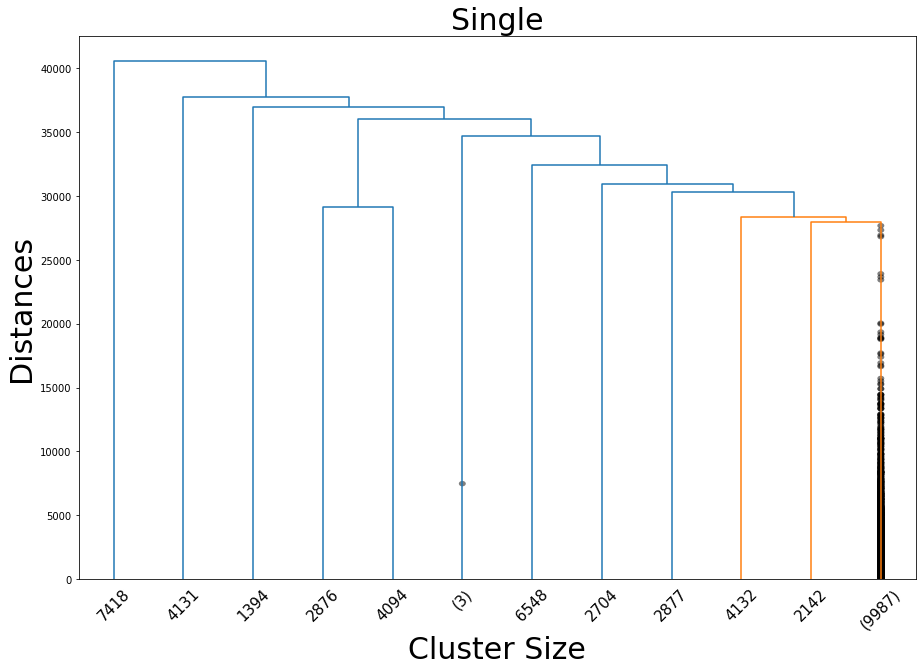

In [107]:
plt.figure(figsize=(15,10))
Z=linkage(Hierarchical_final_data,method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [171]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(Hierarchical_final_data)


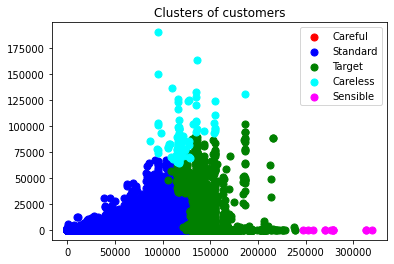

In [170]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [ ]:
# method complete

Z-Shape: (9999, 4)


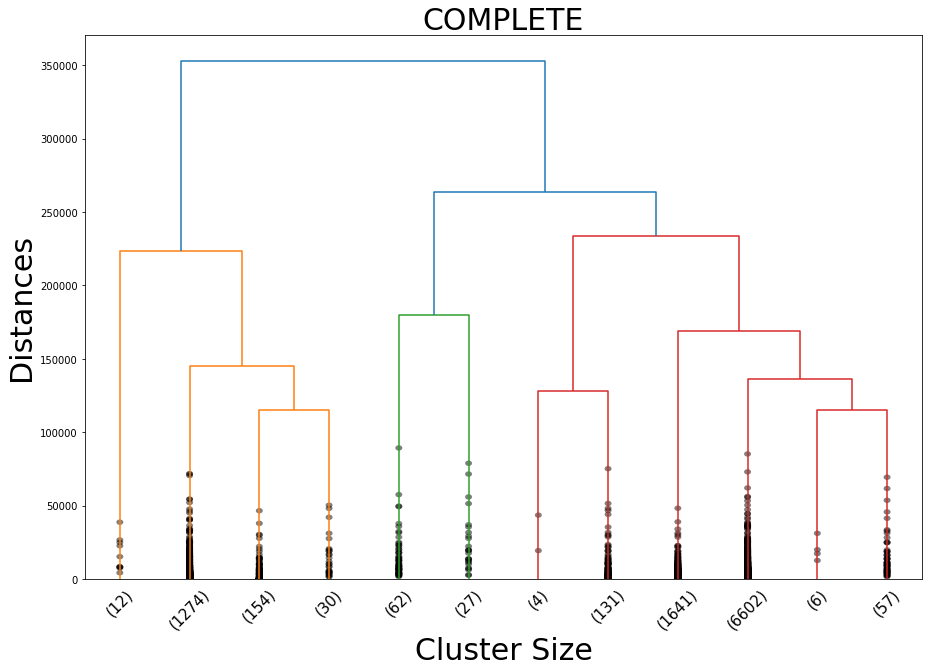

In [109]:
plt.figure(figsize=(15,10))
Z=linkage(Hierarchical_final_data,method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [165]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(Hierarchical_final_data)
X = Hierarchical_final_data.iloc[:, :].values

print (X)

[[ 57534.65      0.        0.    11253.16  11961.34   4532.63]
 [ 57678.5       0.        0.    10284.88   7176.8    4755.14]
 [ 63532.93      0.        0.    12495.83  12918.24   4702.71]
 ...
 [109742.06   7612.45   8048.6   22568.33  12918.24   9609.54]
 [114150.59  12086.52   8086.49  23402.94  12918.24   9703.29]
 [109730.02  18982.31  13339.8   23017.47  12918.24   9699.59]]


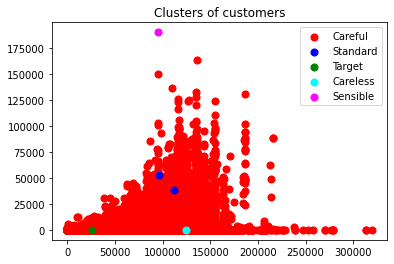

In [172]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')

plt.legend()
plt.show()

Z-Shape: (9999, 4)


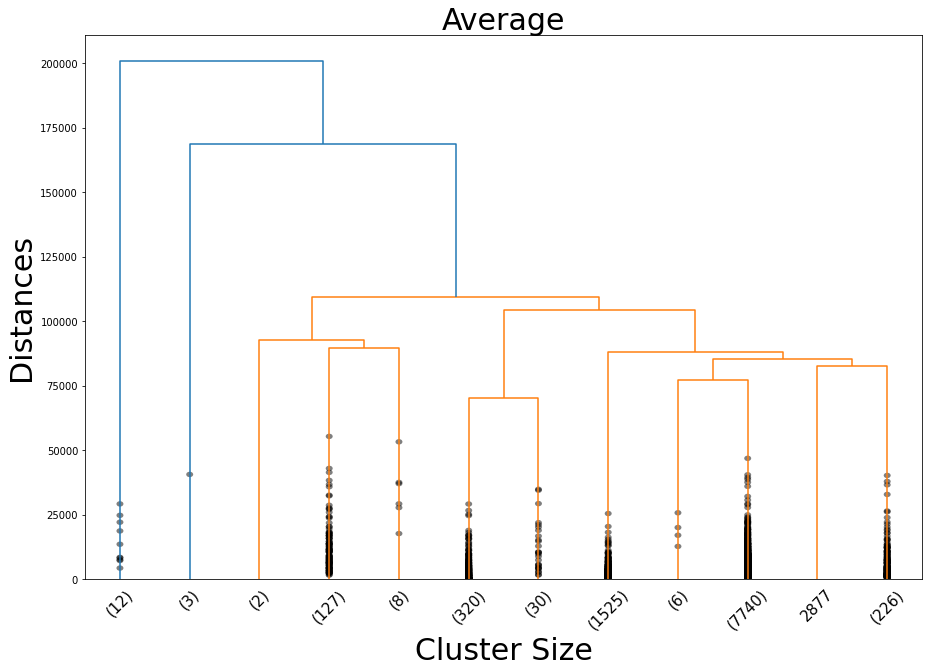

In [173]:
# average method 

plt.figure(figsize=(15,10))
Z=linkage(Hierarchical_final_data,method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (9999, 4)


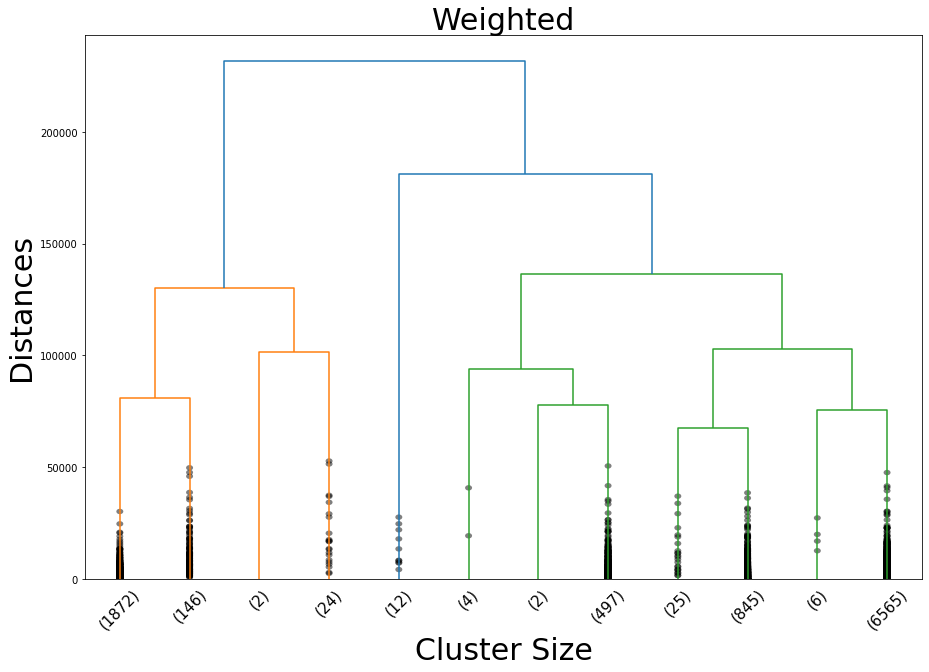

In [111]:
#weighted method 
plt.figure(figsize=(15,10))
Z=linkage(Hierarchical_final_data,method='weighted')
print("Z-Shape:",Z.shape)
plt.title("Weighted",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (9999, 4)


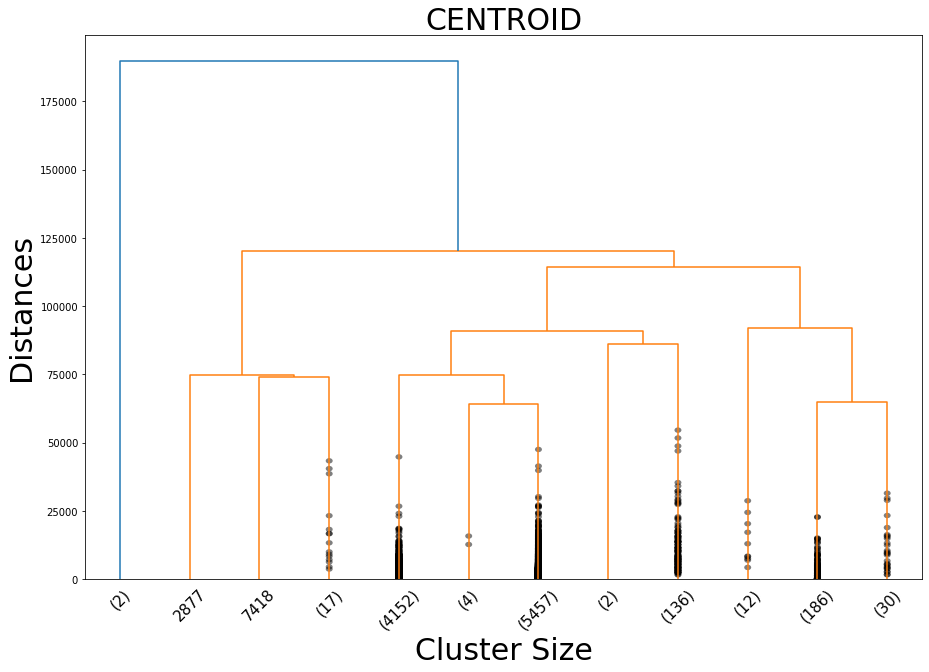

In [112]:
# centroid method
plt.figure(figsize=(15,10))
Z=linkage(Hierarchical_final_data,method='centroid')
print("Z-Shape:",Z.shape)
plt.title("CENTROID",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (9999, 4)


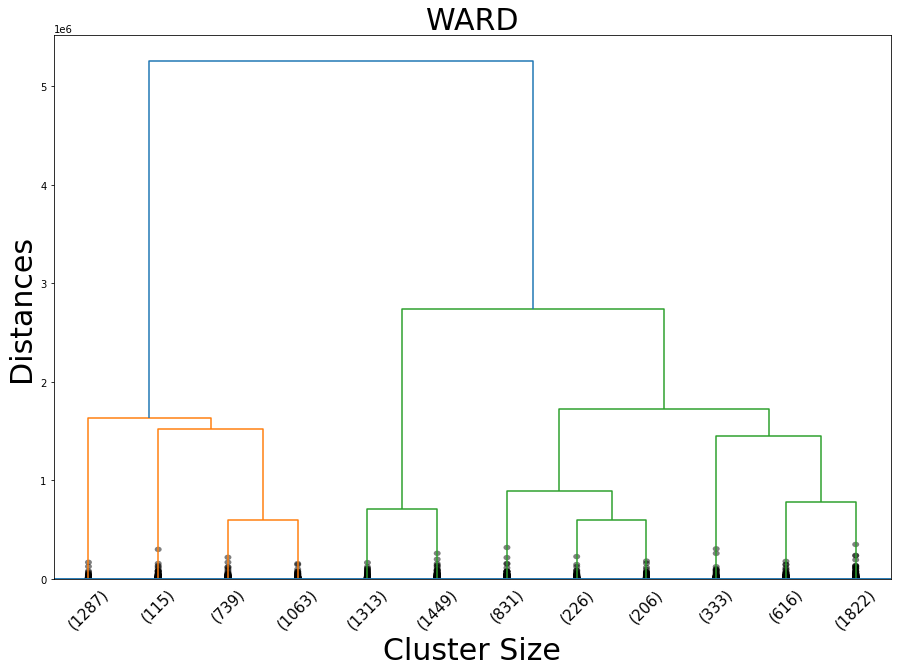

In [113]:
# ward method
plt.figure(figsize=(15,10))
Z=linkage(Hierarchical_final_data,method='ward')
print("Z-Shape:",Z.shape)
plt.title("WARD",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.axhline(y=500)
plt.axhline(y=1500)
plt.show()

In [155]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Hierarchical_final_data)

In [156]:
X = Hierarchical_final_data.iloc[:, :].values
# X = Hierarchical_final_data.iloc[:, [0, 5]].values
print (X)

[[ 57534.65      0.        0.    11253.16  11961.34   4532.63]
 [ 57678.5       0.        0.    10284.88   7176.8    4755.14]
 [ 63532.93      0.        0.    12495.83  12918.24   4702.71]
 ...
 [109742.06   7612.45   8048.6   22568.33  12918.24   9609.54]
 [114150.59  12086.52   8086.49  23402.94  12918.24   9703.29]
 [109730.02  18982.31  13339.8   23017.47  12918.24   9699.59]]


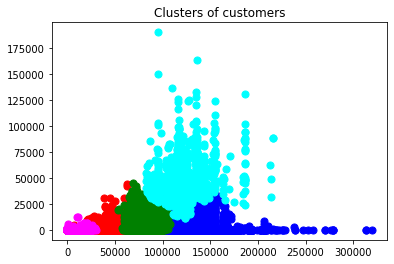

In [158]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.show()